# Trensorflow Example

## Evan Gordon

This notebook is based off of the example tensor at:
https://cobaltai.in/tag/tensorflow/

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
#define print function
def showOutput(o):
    print('Output type was: ')
    print(type(o))
    print('This tensor calculated: ' + str(o) + '\nThe expected result was: 23')

In [3]:
a = tf.constant(5, name="input_a")#input of value 5
b = tf.constant(3, name="input_b")#input of value 3

c = tf.add(a, b, name='add_c')#add a & b = 8
d = tf.multiply(a, b, name='multiply_d')#multiply a & b = 15
                
e = tf.add(c, d, name='add_e')#add c + d = 23

sess = tf.Session()
output = sess.run(e)
showOutput(output)

Output type was: 
<class 'numpy.int32'>
This tensor calculated: 23
The expected result was: 23


Now we will do the same thing with tensor objects

In [4]:
inputs = tf.constant([5,3], name="input_row")
sum_left = tf.reduce_sum(a, name="sum_left")
product_right = tf.reduce_prod(a, name="prod_right")
sum_final = tf.add(sum_left, product_right, name="add_d")#initializes  add op

sess = tf.Session()
output = sess.run(sum_final)
showOutput(sum_final)

Output type was: 
<class 'tensorflow.python.framework.ops.Tensor'>
This tensor calculated: Tensor("add_d:0", shape=(), dtype=int32)
The expected result was: 23


### Working with numpy

Sometimes with tensorflow we'll want to work with numpy datatypes, thankfully tensorflow has resources built in for that

In [7]:
a = np.array([2, 3], dtype=np.int32)
b = np.array([4, 5], dtype=np.int32)

c = tf.add(a, b)

### Math with Tensorflow

The following is a list of common mathematical operations that are overloaded in tensorflow<br/>
`
z = -x  # z = tf.negative(x)<br/>
z = x + y  # z = tf.add(x, y))<br/>
z = x - y  # z = tf.subtract(x, y))<br/>
z = x * y  # z = tf.multiply(x, y))<br/>
z = x / y  # z = tf.div(x, y))<br/>
z = x // y  # z = tf.floordiv(x, y))<br/>
z = x % y  # z = tf.mod(x, y))<br/>
z = x ** y  # z = tf.pow(x, y))<br/>
z = x @ y  # z = tf.matmul(x, y))<br/>
z = x > y  # z = tf.greater(x, y))<br/>
z = x >= y  # z = tf.greater_equal(x, y))<br/>
z = x < y  # z = tf.less(x, y))<br/>
z = x <= y  # z = tf.less_equal(x, y))<br/>
z = abs(x)  # z = tf.abs(x))<br/>
z = x & y  # z = tf.logical_and(x, y))<br/>
z = x | y  # z = tf.logical_or(x, y))<br/>
z = x ^ y  # z = tf.logical_xor(x, y))<br/>
z = ~x  # z = tf.logical_not(x))<br/>
`

### Tensorflow Graphs
Graphs are essentially models. Behind the scenes tesorflow by default will create a graph for you, when you scope a graph with `with my_graph.as_default():` you can define additional models.<br/>
BEST PRACTICE!!!<br/>
Don't use the default graph, always scope!<br/>
Assign the default graph to a variable right off the bat!<br/>

In [9]:
default_graph = tf.get_default_graph()

att_to_default_graph = tf.add(3, 4) # add to default graph

graph = tf.Graph() #explicitly create graph

with graph.as_default(): #modify graph (model)
    a = tf.multiply(2, 3)
    
    # ...

with default_graph.as_default():
    b = tf.add(4, 5)
    
also_default = tf.div(2, 1)

### Tensorflow Sessions

Now that we have defined our graphs, we need to... do something with them!<br/>

A `tf.Session()` has three optional constructor arguments<br/> 
First, `target`, for connecting to tf.train.Server instances to speed up training<br/> 
Second, `graph`, can be left blank for using the default.<br/> 
Finally, `config`, Used for config options such as limiting number of cpus/gpus to be used, and logging options<br/> 

#### Session Functions
`run`: Runs operations and evaluates tensor<br/>
`as_default`: Like with Graphs, used to scope session, a scoped session automatically calls close<br/>
`close`: Release session resources, make sure to do this after you are done. Only use when outside of context<br/>
`reset`: Resets target session<br/>

In [17]:
# Build a graph.
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b

# From Tensorflow docs, these  are equivilent
# 1) Using the `close()` method.
sess = tf.Session()
print('Result from session one:')
print(sess.run(c))
sess.close()


# 2) Using the context manager.
with tf.Session() as sess:
  print('Result from session two:')
  print(sess.run(c))


Result from session one:
30.0
Result from session two:
30.0


### Tensorflow Placeholders

We're getting closer to some real Machine Learning here. Up until now we've done simple calculations, but we will need to be able to work on larger sets of data if we want to really get cooking. We can use Placeholders to get one step closer to that.

In [39]:
g1 = tf.Graph()
with g1.as_default():
    a = tf.placeholder("float", None)
    b = a * 2

with tf.Session(graph=g1) as session:
    result = session.run(b, feed_dict={a: [1, 2, 3, 4 ,5]})#fedd_dict will feed data into the graph
    print('Result of graph 1:')
    print(result)


#you can also declare the placeholder values prior to the run
g2 = tf.Graph()
with g2.as_default():
    c = tf.placeholder("float", None)
    d = tf.div(c, 2)
i_dict = {c: np.array([1, 2, 3, 4, 5], dtype=np.int32)} #c is the handle to the placeholder's output tensor
with tf.Session(graph=g2) as sess:
    result = sess.run(d, feed_dict=i_dict)
    print('Result of graph 2:')
    print(result)
    

Result of graph 1:
[ 2.  4.  6.  8. 10.]
Result of graph 2:
[0.5 1.  1.5 2.  2.5]


### Tensorflow Variables

These are mutable data objects that can be used over multiple run calls. They can be used in tensorflow anywhere you might use a tensor.<br/>

Because variable objects live within the graph they must also be explicitly initialized with `tf.global_variables_initializer()`.<br/>
You can use `.eval()` on a variable to return its value. Like:<br/>
```
val = my_var.eval()
print(val)
```
Generally to initialize variables you can use:
```
tf.initialize_variables([<list>, <of>, <vars>], name="<var_name>")
```

In [89]:
my_var = tf.Variable(3, name="my_variable")#starting variable my_var=3
default_graph = tf.get_default_graph()
with default_graph.as_default():
    add = tf.add(5, my_var)
    mul = tf.multiply(8, my_var)
    add2 = tf.add(add, mul)

    init = tf.global_variables_initializer()
    with tf.Session(graph=default_graph) as sess:
        result = sess.run(init)#init variables
        print(result)
        result2 = sess.run(add)#5 + my_val
        print(result2)
        result3 = sess.run(mul)#8 * my_var
        print(result3)
        result4 = sess.run(add2)#add_output + mul_output
        print(result4)
    
print('\nNow using random value 3x3x3 matrix')
g2 = tf.Graph()
with g2.as_default():
    #create 3x3x3 Tensor of normally distributed numbers; mean 0 and standard deviation 2
    normal = tf.truncated_normal([3,3,3], mean=0.0 , stddev=2.0)#random_normal also works, but truncated is better
    add = tf.add(tf.cast(2, tf.float32), normal)
    with tf.Session(graph=g2) as session:
        result = session.run(tf.global_variables_initializer())
        print(result)
        result2 = session.run(add)
        print(result2)

None
8
24
32

Now using random value 3x3x3 matrix
None
[[[ 0.3646946   2.069419    1.5383494 ]
  [ 0.8336835  -1.0784833  -0.24278998]
  [ 4.052278    1.6542242  -1.5190055 ]]

 [[ 3.8875957   1.2246692   4.3260927 ]
  [ 2.2855372   1.1833329   2.9488802 ]
  [-0.43104434 -0.18736339  0.69725966]]

 [[ 4.2174616   1.6233488   2.3639822 ]
  [ 3.9829865   3.3423777   1.8756356 ]
  [ 5.8693156   3.14119    -0.04588413]]]


### Lets go back to our original example

We can now use a more tensorflow structure in our original example. 

In [51]:
g = tf.Graph()
with g.as_default():
    a = tf.constant([5,3], name="input_a")
    b = tf.reduce_sum(a, name="sum_b")
    c = tf.reduce_prod(a, name="prod_c")
    d = tf.add(b,c, name="add_d")

with tf.Session(graph=g) as sess:
    result = sess.run(d)
    print(result)

23


### Onward to Gradient decent

We're now moving on to the real fundamentals to of machine learning. If you dont know what Gradient decent is, don't worry, head on over to: https://cobaltai.in/understanding-gradient-descent/ for a solid article on the subject.<br/>

Now in the spirit of the tutorial that we're working along, we're going to create a simple model to predict y given an x value

In [140]:
#functions
def loss(X, Y, weight, bias):# Return the loss value for a given prediction, loss is how far off our prediction was or the mean squared error
    Y_predicted = tf.add(tf.multiply(X, weight), bias)# Return the predicted value for given input `X`
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))

14.118301
13.827997
13.546494
13.27349
13.008747
12.752002
12.503017
12.261558
12.027391
11.800306

Training cost= 11.582259 W= 0.48090044 b= -0.14009394 



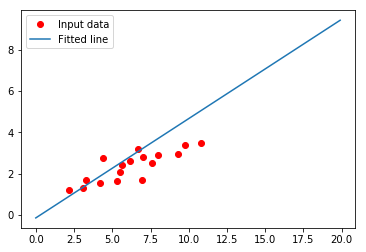

In [141]:
#variables
log_step = 100
rng = np.random
graph = tf.Graph()
np.random.seed(42)#for reproducability
learning_rate = 0.0000001#learning rate is used to define how fast the model will 'learn'

with graph.as_default():
    #use random weight and bias
    W = tf.Variable(rng.randn(), name="weights")
    b = tf.Variable(rng.randn(), name="bias")
    x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                        7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                        2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    train_X = tf.to_float(x)
    train_Y = tf.to_float(y)
    
    with tf.Session() as sess:
        tf.global_variables_initializer().run()#init tf variables
        total_loss = loss(train_X, train_Y, W, b)
        train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)
        coord = tf.train.Coordinator()#this guy creates the threads for our training
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)#start queue
        training_steps = 1000#often in ml called epochs
        for step in range(training_steps):#run session
            sess.run(train_op)
            if(step % log_step == 0):
                print(total_loss.eval())

        coord.request_stop()
        coord.join(threads)
        
        # Define data for plotting fitted line
        X_plot = np.arange(20, step=0.1)
        y_plot = float(sess.run(W)) * X_plot + float(sess.run(b))
        
        training_cost = sess.run(total_loss, feed_dict={train_X: x, train_Y: y})
        print("\nTraining cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
        plt.plot(x, y, 'ro', label='Input data')
        plt.plot(X_plot, y_plot, label='Fitted line')#plot prediction graph
        plt.legend()
        plt.show()
        
        sess.close()